## Observations and Insights 

1. The Gender of the mice in the study were approximately equal, with 49% of indivdiduals Female and 51% Male whereas the number of timepoints for each Drug Regimen varied from condition to condition. 
2. When considering the final volume top four Drug Regimen treatments, Capomulin, Ramicane, Infubinol, and Ceftamin, there were differences among the mean of the tumor volumes for mice at the final timepoint measured.  
3. Drug Treatments Ramicane and Capomulin show the most promise with the lowest mean final volume, 36.2 and 36.6 mm3, respectively, whereas mice treated with Infubinol and Ceftamin had higher final tumor volumnes of 58.2 and 57.8 mm3, respectively. 
4. Mice treated with Capomulin showed a marked decrease of tumor volume over time during the course of treatment, starting at 45 (mm3) at 0 days, and 23 (mm3) at the last timepoint, 45 days later. 
5. There is a strong positive relationship with a high goodness of fit (r^2 = 0.9) between tumomr volume and weight of the individual mouse, suggesting that as tumor volume increases, it drives increases in the weight of the mouse. 

In [1393]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')

# Display the data table for preview
combined_study_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [1394]:
# Checking the number of mice in the original dataframe
Mice_count = combined_study_df["Mouse ID"].value_counts()
Mice_count 

g989    13
m546    10
w422    10
q597    10
j119    10
        ..
x336     1
f932     1
l872     1
t573     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [1395]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
no = combined_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_loc = combined_study_df.loc[combined_study_df.duplicated(subset=['Mouse ID', 'Timepoint']), :]
duplicate_loc

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [1396]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_loc_byid = duplicate_loc['Mouse ID'].unique()
duplicate_loc_byid


array(['g989'], dtype=object)

In [1397]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_study_clean_df= combined_study_df[~combined_study_df['Mouse ID'].isin(duplicate_loc_byid)]
combined_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1398]:
# Checking the number of mice in the clean DataFrame.
Mice_count_clean = combined_study_clean_df["Mouse ID"].value_counts()
Mice_count_clean

m546    10
w422    10
q597    10
j119    10
q511    10
        ..
o848     1
b447     1
l872     1
u153     1
d133     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [1399]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group Data
Grouped_Stats_df = combined_study_clean_df.groupby(['Drug Regimen'])
Grouped_mean_df = Grouped_Stats_df['Tumor Volume (mm3)'].mean()
Grouped_median_df = Grouped_Stats_df['Tumor Volume (mm3)'].median()
Grouped_variance_df =Grouped_Stats_df['Tumor Volume (mm3)'].var()
Grouped_Stdev_df =Grouped_Stats_df['Tumor Volume (mm3)'].std()
Grouped_sterr_df = Grouped_Stats_df['Tumor Volume (mm3)'].sem()

Summary_table = {
                 "Tumor volume (mm3) Mean": Grouped_mean_df, 
                 "Tumor volume (mm3) Median": Grouped_median_df, 
                 "Tumor volume (mm3) Variance":Grouped_variance_df, 
                 "Tumor volume (mm3) Standard Dev":Grouped_Stdev_df,
                 "Tumor volume (mm3) Standard Error":Grouped_sterr_df,
                }
Summary_table_df = pd.DataFrame(Summary_table)
Summary_table_df

,Tumor volume (mm3) Mean,Tumor volume (mm3) Median,Tumor volume (mm3) Variance,Tumor volume (mm3) Standard Dev,Tumor volume (mm3) Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1400]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
combined_study_clean_df.groupby(['Drug Regimen']).agg(
 
     Mean=('Tumor Volume (mm3)', "mean"),
     Median=('Tumor Volume (mm3)', "median"),
     Variance=('Tumor Volume (mm3)', "var"),
     StandardDev=('Tumor Volume (mm3)', "std"),
     StandardErr=('Tumor Volume (mm3)', "sem")
 )


,Mean,Median,Variance,StandardDev,StandardErr
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

<Figure size 432x288 with 0 Axes>

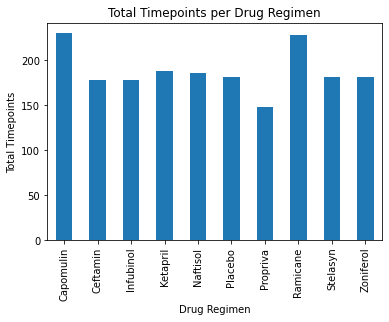

In [1401]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Grouped_Regimen_df = combined_study_clean_df.groupby(['Drug Regimen']).count()

plt.figure()
Grouped_Regimen_df.plot(kind="bar", y='Timepoint', xlabel="Drug Regimen", ylabel="Total Timepoints", legend=False, title="Total Timepoints per Drug Regimen")

Text(0, 0.5, 'Total Timepoints')

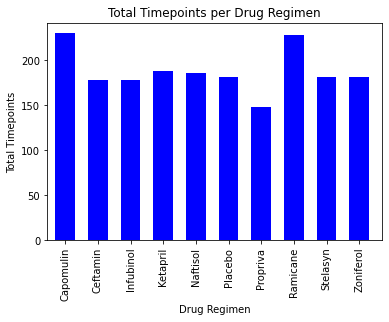

In [1402]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(Grouped_Regimen_df))
tick_locations = [value+0.3 for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, Grouped_Regimen_df["Timepoint"], color='b', alpha=1, align="edge", width=0.6)
plt.xticks(tick_locations, Grouped_Regimen_df.index, rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.title("Total Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")

<AxesSubplot:title={'center':'Distrubution of female vs male mice'}, ylabel='Mouse ID'>

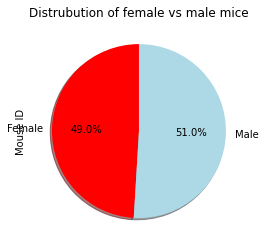

In [1403]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
combined_study_clean_df.groupby(['Sex']).count().plot(kind='pie', legend=False, y='Mouse ID', shadow = True, startangle=90, title='Distrubution of female vs male mice', autopct='%1.1f%%', colors = ['red', 'lightblue'])


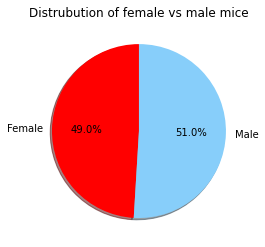

In [1404]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Grouped_Gender_df = combined_study_clean_df.groupby(['Sex']).count()
Lables = Grouped_Gender_df.index
sizes = Grouped_Gender_df.iloc[:,1]
colors = ["red", "lightskyblue"]
plt.pie(sizes, labels=Lables, colors=colors,  autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('Distrubution of female vs male mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [1405]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Grouped_mouse = combined_study_clean_df.groupby(["Mouse ID"])["Timepoint"].max()
Group_mousereset = Grouped_mouse.reset_index()
combined_max_study_df = pd.merge(Group_mousereset, combined_study_clean_df, how='inner', on=['Mouse ID', 'Timepoint'])
combined_max_study_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [1406]:
# Put treatments into a list for for loop (and later for plot labels) Capomulin, Ramicane, Infubinol, and Ceftamin
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
Treatments = ['Infubinol', 'Ceftamin','Ramicane', 'Capomulin']
Tumor_vol_out = []
Tumor_vol = []
Tumor_vol_mean  = []
 
for treatment in Treatments:
    Data = combined_max_study_df[combined_max_study_df['Drug Regimen'] == treatment][['Tumor Volume (mm3)']]
    list_of_names = Data['Tumor Volume (mm3)'].to_list()
    Tumor_vol.append(list_of_names)
    quartiles = Data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    mean = Data['Tumor Volume (mm3)'].mean()
    Out =  Data.loc[(Data['Tumor Volume (mm3)'] < lower_bound) | (Data['Tumor Volume (mm3)'] > upper_bound)]
    if len(Out) > 0:
        print(f"Outliers for {treatment} are {Out}")
    Tumor_vol_out.append(Out)
    Tumor_vol_mean.append(mean)

Outliers for Infubinol are     Tumor Volume (mm3)
31           36.321346


In [1407]:
Tumor_vol_mean # get list of means for additional analysis

[58.1782457852, 57.7539768252, 36.1913904284, 36.6675677192]

([<matplotlib.axis.XTick at 0x22d2c667388>,
 [Text(1, 0, 'Infubinol'),
  Text(2, 0, 'Ceftamin'),
  Text(3, 0, 'Ramicane'),
  Text(4, 0, 'Capomulin')])

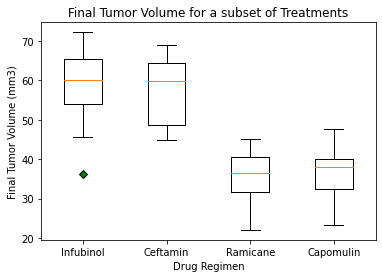

In [1408]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for a subset of Treatments')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(Tumor_vol, flierprops=green_diamond)
plt.xticks([1, 2, 3, 4], Treatments)

## Line and Scatter Plots

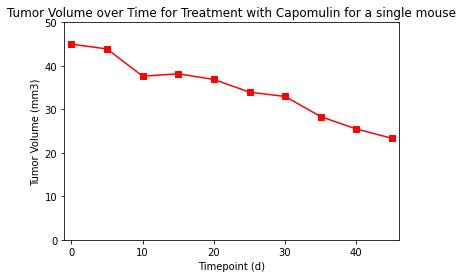

In [1409]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_cleaned = combined_study_clean_df[combined_study_clean_df["Drug Regimen"] == 'Capomulin']
Mice_df = Capomulin_cleaned[Capomulin_cleaned["Mouse ID"].isin(Capomulin_cleaned.iloc[0:1,0])]

volume = Mice_df["Tumor Volume (mm3)"]
time = Mice_df["Timepoint"]

plt.plot(time, volume, marker ='s', color='red')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (d)')
plt.title('Tumor Volume over Time for Treatment with Capomulin for a single mouse')

plt.xlim(-1,46)
plt.ylim(0,50)
plt.show()

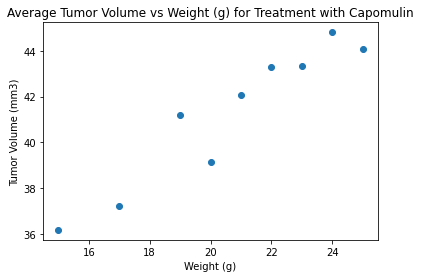

In [1410]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Capomulin_cleaned = combined_study_clean_df[combined_study_clean_df["Drug Regimen"] == 'Capomulin']
Capomlin_grouped = Capomulin_cleaned.groupby(["Weight (g)"]).mean()
volume = Capomlin_grouped["Tumor Volume (mm3)"]
weight = Capomlin_grouped.index

plt.scatter(weight,volume)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Average Tumor Volume vs Weight (g) for Treatment with Capomulin')
plt.show()

## Correlation and Regression

The linear regression is: y = 0.89x + 22.76
The r-squared is: 0.9035
The correlation between both factors is 0.95


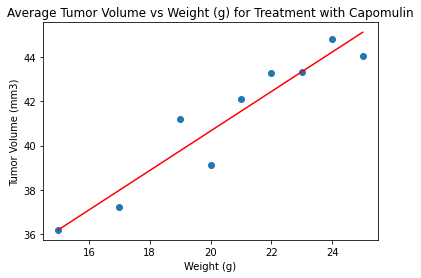

In [1411]:
correlation = st.pearsonr(volume,weight)

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r2 = rvalue**2
plt.scatter(weight,volume)

plt.plot(weight,regress_values,"r-")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Average Tumor Volume vs Weight (g) for Treatment with Capomulin')
print(f"The linear regression is: {line_eq}")
print(f"The r-squared is: {round(r2,4)}")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()